<a href="https://colab.research.google.com/github/Yogiii13/Google-Colab-/blob/main/Movie_recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
movies_df = pd.read_csv('/content/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies_df.shape

(42518, 3)

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42518 entries, 0 to 42517
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  42518 non-null  int64 
 1   title    42518 non-null  object
 2   genres   42517 non-null  object
dtypes: int64(1), object(2)
memory usage: 996.6+ KB


In [ ]:
if 'genres' in movies_df.columns:
    movies_df['genres'] = movies_df['genres'].fillna('Unknown')

    unknown_count = (movies_df['genres'] == 'Unknown').sum()
    print(f"\nNumber of movies with unknown genres: {unknown_count}")
else:
    print("Warning: 'genres' column is missing. Adding an empty 'genres' column.")
    movies_df['genres'] = 'Unknown'


Number of movies with unknown genres: 1


In [ ]:
print("Movies Dataset:")
movies_df.head()

Movies Dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
def extract_year(title):
    """Extract the year from a movie title that includes the year in parentheses."""
    if pd.isna(title):
        return None
    match = re.search(r'\((\d{4})\)', str(title))
    if match:
        return int(match.group(1))
    return None

In [ ]:
movies_df['year'] = movies_df['title'].apply(extract_year)
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [ ]:
# Display dataset statistics
print(f"\nTotal number of movies: {len(movies_df)}")
if 'year' in movies_df:
    year_stats = movies_df['year'].describe()
    print(f"\nYear statistics:")
    print(f"- Earliest movie year: {movies_df['year'].min()}")
    print(f"- Latest movie year: {movies_df['year'].max()}")
    print(f"- Most common decade: {(movies_df['year'] // 10 * 10).value_counts().index[0]}s")


Total number of movies: 42518

Year statistics:
- Earliest movie year: 1874.0
- Latest movie year: 2019.0
- Most common decade: 2000.0s


In [ ]:
# Extract unique genres
if 'genres' in movies_df:
    all_genres = set()
    for genres in movies_df['genres'].dropna():
        if '|' in str(genres):
            all_genres.update(genres.split('|'))
        else:
            all_genres.add(genres)

    print(f"\nNumber of unique genres: {len(all_genres)}")
    print(f"Unique genres: {', '.join(sorted(all_genres))}")



Number of unique genres: 21
Unique genres: (no genres listed), Action, Adventure, Animation, Children, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, IMAX, Musical, Mystery, Romance, Sci-Fi, Thriller, Unknown, War, Western


In [ ]:
print("\nBreakdown of Movies by Genre:")
genre_counts = {}
for genres in movies_df['genres'].dropna():
    if pd.isna(genres) or genres == 'Unknown':
        if 'Unknown' in genre_counts:
            genre_counts['Unknown'] += 1
        else:
            genre_counts['Unknown'] = 1
        continue

    if '|' in genres:
        for genre in genres.split('|'):
            if genre in genre_counts:
                genre_counts[genre] += 1
            else:
                genre_counts[genre] = 1
    else:
        if genres in genre_counts:
            genre_counts[genres] += 1
        else:
            genre_counts[genres] = 1

genre_df = pd.DataFrame({'Genre': list(genre_counts.keys()), 'Count': list(genre_counts.values())})
genre_df = genre_df.sort_values('Count', ascending=False)

# Display the DataFrame
print(genre_df)


Breakdown of Movies by Genre:
                 Genre  Count
6                Drama  18756
3               Comedy  11889
9             Thriller   6246
5              Romance   5839
7               Action   5328
8                Crime   4165
10              Horror   3953
14         Documentary   3302
0            Adventure   3172
19  (no genres listed)   2867
12              Sci-Fi   2400
11             Mystery   2150
2             Children   1842
4              Fantasy   1826
15                 War   1513
1            Animation   1423
17             Western   1223
16             Musical   1054
18           Film-Noir    353
13                IMAX    195
20             Unknown      1


In [ ]:
movies_df = movies_df[movies_df['genres'] != '(no genres listed)']

genre_counts = {}
for genres in movies_df['genres'].dropna():
    if pd.isna(genres) or genres == 'Unknown':
        if 'Unknown' in genre_counts:
            genre_counts['Unknown'] += 1
        else:
            genre_counts['Unknown'] = 1
        continue

    if '|' in genres:
        for genre in genres.split('|'):
            if genre in genre_counts:
                genre_counts[genre] += 1
            else:
                genre_counts[genre] = 1
    else:
        if genres in genre_counts:
            genre_counts[genres] += 1
        else:
            genre_counts[genres] = 1

genre_df = pd.DataFrame({'Genre': list(genre_counts.keys()), 'Count': list(genre_counts.values())})
genre_df = genre_df.sort_values('Count', ascending=False)

genre_df


,Genre,Count
6,Drama,18756
3,Comedy,11889
9,Thriller,6246
5,Romance,5839
7,Action,5328
8,Crime,4165
10,Horror,3953
14,Documentary,3302
0,Adventure,3172
12,Sci-Fi,2400


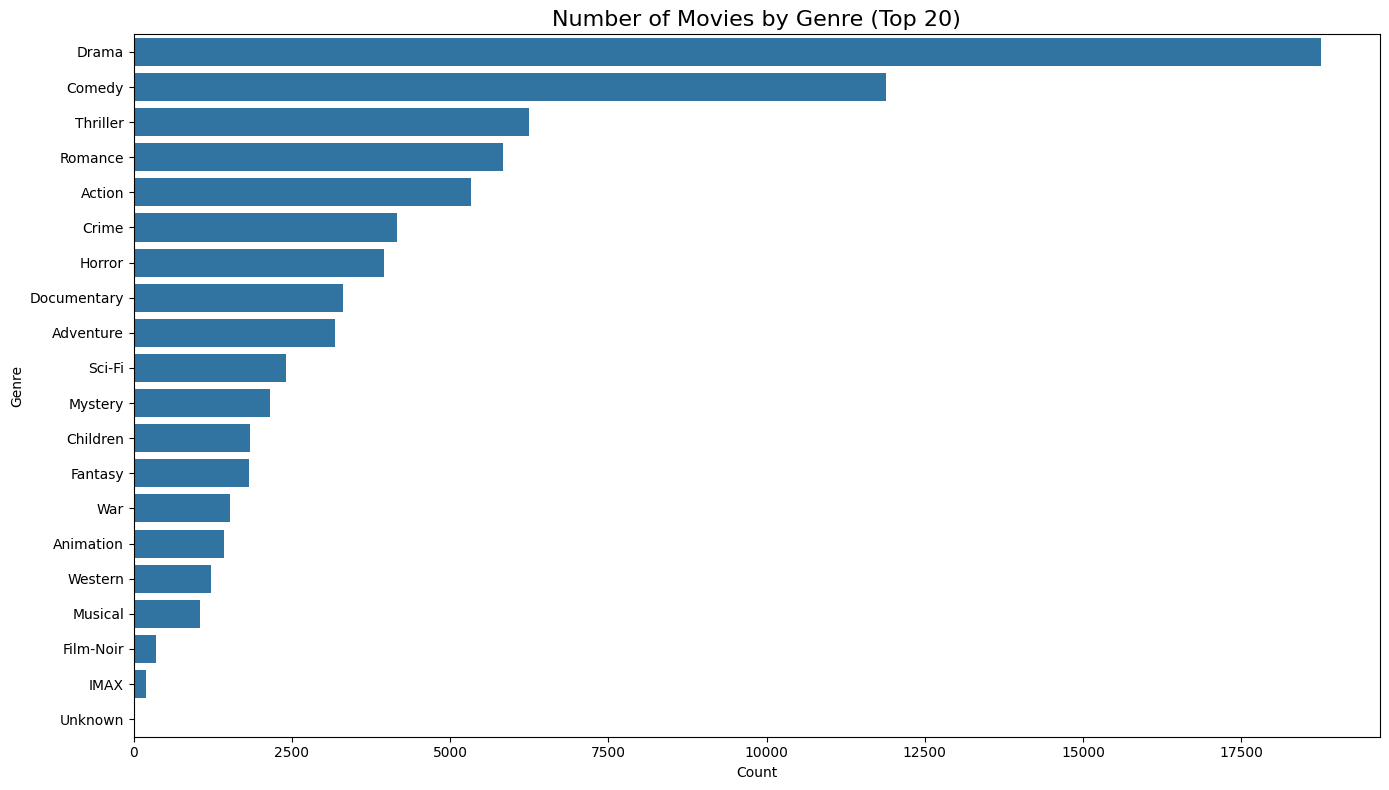

In [ ]:
plt.figure(figsize=(14, 8))
top_n = min(20, len(genre_df))
sns.barplot(x='Count', y='Genre', data=genre_df.nlargest(top_n, 'Count'))
plt.title('Number of Movies by Genre (Top 20)', fontsize=16)
plt.tight_layout()
plt.show()

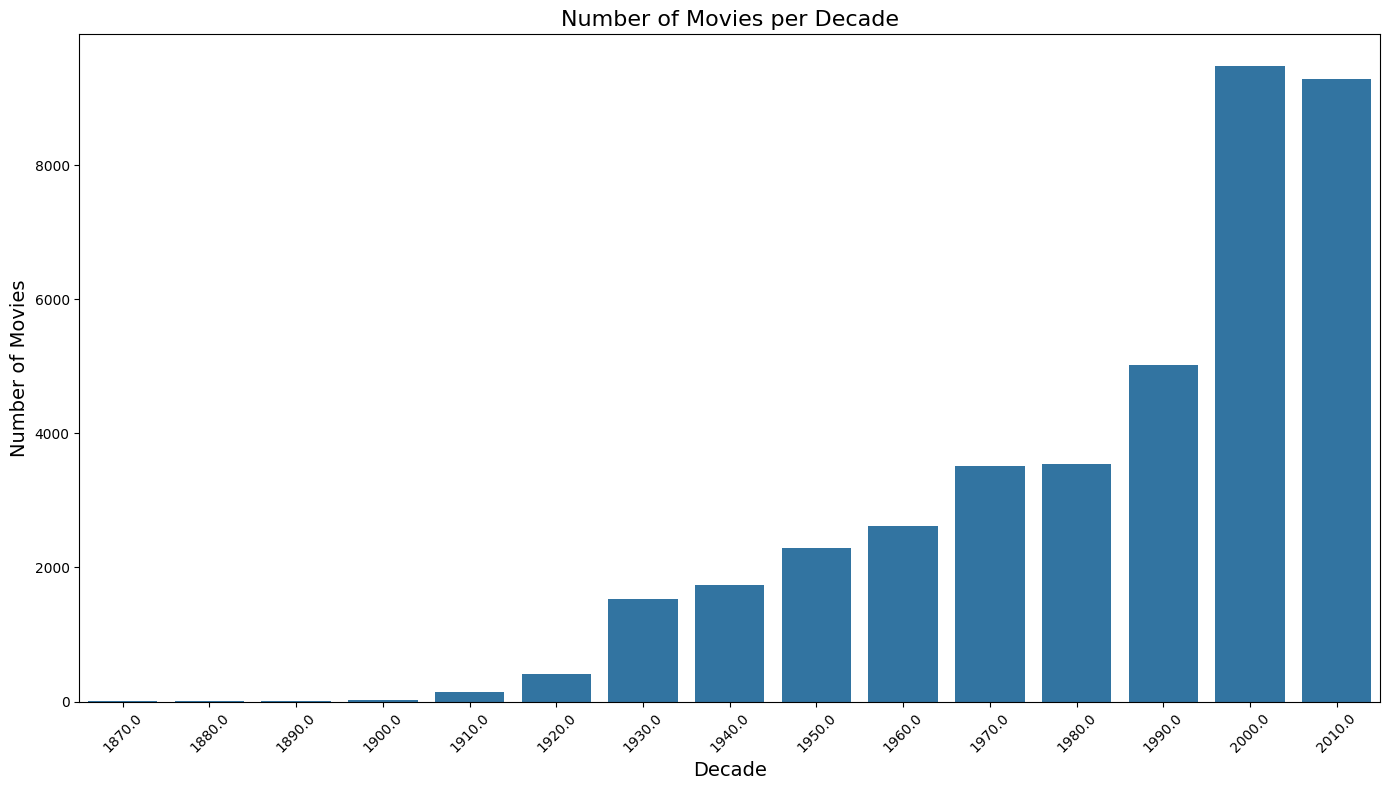

In [ ]:
# Movies per decade
if 'year' in movies_df and not movies_df['year'].isna().all():
    movies_df['decade'] = (movies_df['year'] // 10) * 10
    decade_counts = movies_df['decade'].value_counts().sort_index()

    plt.figure(figsize=(14, 8))
    sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values)
    plt.title('Number of Movies per Decade', fontsize=16)
    plt.xlabel('Decade', fontsize=14)
    plt.ylabel('Number of Movies', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
def create_features(movie):
    features = []

    # Add genres if available
    if 'genres' in movie and not pd.isna(movie['genres']) and movie['genres'] != 'Unknown':
        features.extend(movie['genres'].split('|'))

    # Add decade if available
    if 'year' in movie and not pd.isna(movie['year']):
        features.append(f"year_{(movie['year'] // 10) * 10}s")

    if not features:
        return "Unknown"

    return " ".join(features)

In [ ]:
# Apply feature creation
movies_df['features'] = movies_df.apply(create_features, axis=1)

In [ ]:
# Create feature vectors using CountVectorizer
print("\nCreating feature vectors for content-based recommendations...")
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(movies_df['features'])
print(f"Feature matrix shape: {count_matrix.shape}")



Creating feature vectors for content-based recommendations...
Feature matrix shape: (39651, 38)


In [ ]:
def get_recommendations_by_genre(genre, n=10):
    """
    Get recommendations for movies with a specific genre
    """
    # Filter movies by genre
    if '|' in genre:
        # If multiple genres specified, split and check for any match
        genres = genre.split('|')
        genre_filtered = movies_df[movies_df['genres'].apply(
            lambda x: any(g in str(x).split('|') for g in genres) if not pd.isna(x) else False
        )]
    else:
        # Filter for single genre
        genre_filtered = movies_df[movies_df['genres'].apply(
            lambda x: genre in str(x).split('|') if not pd.isna(x) else False
        )]

    if genre_filtered.empty:
        print(f"No movies found with genre '{genre}'.")
        return pd.DataFrame()

    # Return a sample of movies from that genre
    if len(genre_filtered) <= n:
        return genre_filtered[['movieId', 'title', 'genres', 'year']]
    else:
        return genre_filtered.sample(n)[['movieId', 'title', 'genres', 'year']]

In [ ]:
def recommend_movies():
    genre = input("Enter a movie genre: ")
    recommendations = get_recommendations_by_genre(genre, n=5)

    if not recommendations.empty:
        print(f"\nRecommended movies for genre '{genre}':")
        from IPython.display import display, HTML
        display(HTML(recommendations[['title', 'genres']].to_html(index=False)))
    else:
        print(f"No recommendations found for the given genre")

recommend_movies()

Enter a movie genre: Drama

Recommended movies for genre 'Drama':


title,genres
Chocolate (2008),Action|Drama
"Enchanted Cottage, The (1945)",Drama|Romance
Crazy in Alabama (1999),Comedy|Drama
Kahlekuningas (2002),Comedy|Drama
Mother and Child (2009),Drama|Romance


In [ ]:
def recommend_movies():
    genre = input("Enter a movie genre: ")
    recommendations = get_recommendations_by_genre(genre, n=5)

    if not recommendations.empty:
        print(f"\nRecommended movies for genre '{genre}':")
        from IPython.display import display, HTML
        display(HTML(recommendations[['title', 'genres']].to_html(index=False)))
    else:
        print(f"No recommendations found for the given genre")

recommend_movies()

Enter a movie genre: Action

Recommended movies for genre 'Action':


title,genres
Here Comes the Boom (2012),Action|Comedy
New York Cop (Nyû Yôku no koppu) (1993),Action|Crime
Free State of Jones (2016),Action|Drama|Thriller
Afraid to Die (1960),Action|Drama
Kill the Irishman (2011),Action|Crime
